# Midterm 1 Practice Test - Takehome Part - Solutions

## <u>Case Study</u> Pokemon Go Analysis

The attached pokemon.csv contains a **random sample** of pokemon from the game Pokemon Go. Each pokemon has 25 attributes listed about each of them. We will explore this dataset to showcase what we have learned about each of the following.
1. Data cleaning
2. Dataframe manipulation
3. Probability
4. Sampling

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\vellison\Miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. Data Cleaning and Data Type Checking

We plan to analyze tmany of the numerical variables in the dataset. In order to ensure that our subsequent functions work appropriately on these variables, you should do the following.
1. Identify any values (if any) that have been encoded in the csv to represent a **missing value**. 
2. Make sure that the values in each of your numerical variables are represented as numerical values (either float64 or int64 object types). If not, fix this using the methods we discussed in class.
3. Delete any rows in your dataframe that have missing values. Remember, some "missing values", in the way that they're currently encoded in the csv may not be initially detectable by Python. It is your job to figure out what these missing values are and make it so Python does detect them. And then delete them.
4. Determine how many rows that you dropped.


First we read in the dataset as is.

In [2]:
df=pd.read_csv('pokemon.csv')
df.head()

,name,species,cp,hp,weight,height,power_up_stardust,power_up_candy,attack_weak,attack_weak_type,...,weight_new,height_new,power_up_stardust_new,power_up_candy_new,attack_weak_new,attack_weak_type_new,attack_weak_value_new,attack_strong_new,attack_strong_type_new,attack_strong_value_new
0,Pidgey1,Pidgey,384,56,2.31,0.34,2500,2,Tackle,Normal,...,2.60,1.24,2500,2,Steel Wing,Steel,15,Air Cutter,Flying,30
1,Pidgey2,Pidgey,366,54,1.67,0.29,2500,2,Quick Attack,Normal,...,1.93,1.05,2500,2,Wing Attack,Flying,9,Air Cutter,Flying,30
2,Pidgey3,Pidgey,353,55,1.94,0.30,3000,3,Quick Attack,Normal,...,3.51,1.11,3000,3,Wing Attack,Flying,9,Air Cutter,Flying,30
3,Pidgey4,Pidgey,338,51,1.73,0.31,3000,3,Tackle,Normal,...,30.00,1.12,3000,3,Steel Wing,Steel,15,Air Cutter,Flying,30
4,Pidgey5,Pidgey,242,45,1.44,0.27,1900,2,Quick Attack,Normal,...,1.42,0.98,1900,2,Wing Attack,Flying,9,Twister,Dragon,25


In [3]:
df.shape

(75, 26)

There are so many columns that we aren't able to visualize them all in the same dataframe. Let's view them 10 columns at a time so we can inspect each column.

In [4]:
df[df.columns[0:10]].head()

,name,species,cp,hp,weight,height,power_up_stardust,power_up_candy,attack_weak,attack_weak_type
0,Pidgey1,Pidgey,384,56,2.31,0.34,2500,2,Tackle,Normal
1,Pidgey2,Pidgey,366,54,1.67,0.29,2500,2,Quick Attack,Normal
2,Pidgey3,Pidgey,353,55,1.94,0.30,3000,3,Quick Attack,Normal
3,Pidgey4,Pidgey,338,51,1.73,0.31,3000,3,Tackle,Normal
4,Pidgey5,Pidgey,242,45,1.44,0.27,1900,2,Quick Attack,Normal


In [5]:
df[df.columns[11:20]].head()

,attack_strong,attack_strong_type,attack_strong_value,cp_new,hp_new,weight_new,height_new,power_up_stardust_new,power_up_candy_new
0,Aerial Ace,Flying,30,694,84,2.60,1.24,2500,2
1,Twister,Dragon,25,669,81,1.93,1.05,2500,2
2,Aerial Ace,Flying,30,659,83,3.51,1.11,3000,3
3,Air Cutter,Flying,30,640,79,30.00,1.12,3000,3
4,Air Cutter,Flying,30,457,69,1.42,0.98,1900,2


In [6]:
df[df.columns[20:]].head()

,attack_weak_new,attack_weak_type_new,attack_weak_value_new,attack_strong_new,attack_strong_type_new,attack_strong_value_new
0,Steel Wing,Steel,15,Air Cutter,Flying,30
1,Wing Attack,Flying,9,Air Cutter,Flying,30
2,Wing Attack,Flying,9,Air Cutter,Flying,30
3,Steel Wing,Steel,15,Air Cutter,Flying,30
4,Wing Attack,Flying,9,Twister,Dragon,25


Then we check the datatypes of each of the variables.

In [7]:
df.dtypes

name                        object
species                     object
cp                           int64
hp                           int64
weight                     float64
height                     float64
power_up_stardust           object
power_up_candy               int64
attack_weak                 object
attack_weak_type            object
attack_weak_value            int64
attack_strong               object
attack_strong_type          object
attack_strong_value          int64
cp_new                      object
hp_new                       int64
weight_new                 float64
height_new                 float64
power_up_stardust_new        int64
power_up_candy_new           int64
attack_weak_new             object
attack_weak_type_new        object
attack_weak_value_new        int64
attack_strong_new           object
attack_strong_type_new      object
attack_strong_value_new      int64
dtype: object

It looks like the the **power_up_stardust** and the **cp_new** variables are supposed to be numerical variables. However, they are represented as 'object' types at the moment. This is an indication that there may be some string values in these columns. Let's inspect all of the unique values in both of these columns.

In [8]:
df['cp_new'].unique()

array(['694', '669', '659', '640', '457', '243', '15', '47', '305', '213',
       '633', '247', '113', '79', '173', 'data suppressed', '624', '619',
       '327', '181', '141', '241', '146', '448', '530', '393', '335',
       '594', '567', '579', '459', '471', '428', '418', '354', '80',
       '647', '205', '185', '16', '27', '245', '272', '151', '49', '140',
       '217', '193', '157', '172', '115', '219', '18', '260', '66', '86',
       '81', '150', '248', '46', '226', '137', '200', '161', '10', '92',
       '1646', '1253', '1591', '1362', '1059', '1340'], dtype=object)

In [9]:
df['power_up_stardust'].unique()

array(['2500', '3000', '1900', '800', '200', '1000', '400', '600',
       'data suppressed', '1600', '2200', '1300'], dtype=object)

It looks like the phrase 'data suppressed' was used to represent a missing value in this csv. Let's read in our dataframe again, this time encoding all 'data suppressed' values with a NaN.

In [10]:
df=pd.read_csv('pokemon.csv', na_values=['data suppressed'])
df.head()

,name,species,cp,hp,weight,height,power_up_stardust,power_up_candy,attack_weak,attack_weak_type,...,weight_new,height_new,power_up_stardust_new,power_up_candy_new,attack_weak_new,attack_weak_type_new,attack_weak_value_new,attack_strong_new,attack_strong_type_new,attack_strong_value_new
0,Pidgey1,Pidgey,384,56,2.31,0.34,2500.0,2,Tackle,Normal,...,2.60,1.24,2500,2,Steel Wing,Steel,15,Air Cutter,Flying,30
1,Pidgey2,Pidgey,366,54,1.67,0.29,2500.0,2,Quick Attack,Normal,...,1.93,1.05,2500,2,Wing Attack,Flying,9,Air Cutter,Flying,30
2,Pidgey3,Pidgey,353,55,1.94,0.30,3000.0,3,Quick Attack,Normal,...,3.51,1.11,3000,3,Wing Attack,Flying,9,Air Cutter,Flying,30
3,Pidgey4,Pidgey,338,51,1.73,0.31,3000.0,3,Tackle,Normal,...,30.00,1.12,3000,3,Steel Wing,Steel,15,Air Cutter,Flying,30
4,Pidgey5,Pidgey,242,45,1.44,0.27,1900.0,2,Quick Attack,Normal,...,1.42,0.98,1900,2,Wing Attack,Flying,9,Twister,Dragon,25


Now the **power_up_stardust** and the **cp_new** variables are correctly represented as variable comprised of exclusively numerical objects like 'float64'.

In [11]:
df.dtypes

name                        object
species                     object
cp                           int64
hp                           int64
weight                     float64
height                     float64
power_up_stardust          float64
power_up_candy               int64
attack_weak                 object
attack_weak_type            object
attack_weak_value            int64
attack_strong               object
attack_strong_type          object
attack_strong_value          int64
cp_new                     float64
hp_new                       int64
weight_new                 float64
height_new                 float64
power_up_stardust_new        int64
power_up_candy_new           int64
attack_weak_new             object
attack_weak_type_new        object
attack_weak_value_new        int64
attack_strong_new           object
attack_strong_type_new      object
attack_strong_value_new      int64
dtype: object

Finally, we will drop all rows with a NaN value in this dataframe.

In [12]:
df=df.dropna()
df.head()

,name,species,cp,hp,weight,height,power_up_stardust,power_up_candy,attack_weak,attack_weak_type,...,weight_new,height_new,power_up_stardust_new,power_up_candy_new,attack_weak_new,attack_weak_type_new,attack_weak_value_new,attack_strong_new,attack_strong_type_new,attack_strong_value_new
0,Pidgey1,Pidgey,384,56,2.31,0.34,2500.0,2,Tackle,Normal,...,2.60,1.24,2500,2,Steel Wing,Steel,15,Air Cutter,Flying,30
1,Pidgey2,Pidgey,366,54,1.67,0.29,2500.0,2,Quick Attack,Normal,...,1.93,1.05,2500,2,Wing Attack,Flying,9,Air Cutter,Flying,30
2,Pidgey3,Pidgey,353,55,1.94,0.30,3000.0,3,Quick Attack,Normal,...,3.51,1.11,3000,3,Wing Attack,Flying,9,Air Cutter,Flying,30
3,Pidgey4,Pidgey,338,51,1.73,0.31,3000.0,3,Tackle,Normal,...,30.00,1.12,3000,3,Steel Wing,Steel,15,Air Cutter,Flying,30
4,Pidgey5,Pidgey,242,45,1.44,0.27,1900.0,2,Quick Attack,Normal,...,1.42,0.98,1900,2,Wing Attack,Flying,9,Twister,Dragon,25


In [13]:
df.shape

(73, 26)

This dataframe originally had 75 observations and now it has 73. Thus 2 rows with missing values were dropped.

## 2. Dataframe Exploration

### 2.1. Species of Pokemon

How many of each species of pokemon are there in this dataset?

In [14]:
df['species'].value_counts()

Pidgey      37
Weedle      20
Caterpie    10
Eevee        6
Name: species, dtype: int64

## 2.2. Pokemon Type

Suppose we know that a Pidgey is a 'Normal' type of Pokemon, Weedle is a 'Poison' type of pokemon, Caterpie is a 'Bug' type of pokemon, and Eevee is a 'Normal' type of pokemon. Add this information as an additional corresponding column in the dataframe.

First we need to create a dataframe that matches the pokemon 'species' to the pokemon 'type'.

In [15]:
df_pokemon_type=pd.DataFrame({'species':['Pidgey', 'Weedle', 'Caterpie', 'Eevee'],
                              'type': ['Normal', 'Poison', 'Bug', 'Normal']})
df_pokemon_type

,species,type
0,Pidgey,Normal
1,Weedle,Poison
2,Caterpie,Bug
3,Eevee,Normal


Then we can merge this new dataframe to our df dataframe to create a new merged one.

In [16]:
df=pd.merge(df,df_pokemon_type)
df

,name,species,cp,hp,weight,height,power_up_stardust,power_up_candy,attack_weak,attack_weak_type,...,height_new,power_up_stardust_new,power_up_candy_new,attack_weak_new,attack_weak_type_new,attack_weak_value_new,attack_strong_new,attack_strong_type_new,attack_strong_value_new,type
0,Pidgey1,Pidgey,384,56,2.31,0.34,2500.0,2,Tackle,Normal,...,1.24,2500,2,Steel Wing,Steel,15,Air Cutter,Flying,30,Normal
1,Pidgey2,Pidgey,366,54,1.67,0.29,2500.0,2,Quick Attack,Normal,...,1.05,2500,2,Wing Attack,Flying,9,Air Cutter,Flying,30,Normal
2,Pidgey3,Pidgey,353,55,1.94,0.30,3000.0,3,Quick Attack,Normal,...,1.11,3000,3,Wing Attack,Flying,9,Air Cutter,Flying,30,Normal
3,Pidgey4,Pidgey,338,51,1.73,0.31,3000.0,3,Tackle,Normal,...,1.12,3000,3,Steel Wing,Steel,15,Air Cutter,Flying,30,Normal
4,Pidgey5,Pidgey,242,45,1.44,0.27,1900.0,2,Quick Attack,Normal,...,0.98,1900,2,Wing Attack,Flying,9,Twister,Dragon,25,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Eevee3,Eevee,500,64,5.11,0.26,2200.0,2,Tackle,Normal,...,0.77,2200,2,Ember,Fire,10,Fire Blast,Fire,100,Normal
69,Eevee7,Eevee,606,74,10.42,0.38,2500.0,2,Tackle,Normal,...,1.26,2500,2,Water Gun,Water,6,Aqua Tail,Water,45,Normal
70,Eevee8,Eevee,548,66,6.87,0.32,2500.0,2,Tackle,Normal,...,0.95,2500,2,Ember,Fire,10,Heat Wave,Fire,80,Normal
71,Eevee9,Eevee,528,66,7.43,0.31,2200.0,2,Quick Attack,Normal,...,0.82,2200,2,Thunder Shock,Electric,5,Thunderbolt,Electric,55,Normal


Now df has the type variable which list the type of pokemon each species is.

## 2.3. CP Analysis

Next, we would like to analyze the CP values for the pokemon in the dataset. 


### 2.3.1. Highest and Lowest CP Values

Display a dataframe that contains just the pokemon name, their species, their type, and the CP value. In addition, this dataframe should only display the pokemon with the 5 highest CP values and the 5 lowest CP values. These 10 rows should be in order from highest CP to lowest CP.

In [17]:
#One way
df[['name','species','type','cp']].sort_values(by=['cp'], ascending=False).iloc[[0,1,2,3,4,68,69,70,71,72],:]

,name,species,type,cp
67,Eevee1,Eevee,Normal,619
69,Eevee7,Eevee,Normal,606
70,Eevee8,Eevee,Normal,548
71,Eevee9,Eevee,Normal,528
72,Eevee10,Eevee,Normal,517
8,Pidgey9,Pidgey,Normal,24
52,Weedle16,Weedle,Poison,16
38,Weedle2,Weedle,Poison,15
65,Caterpie9,Caterpie,Bug,10
6,Pidgey7,Pidgey,Normal,10


### 2.3.2 Names of the Pokemon with the Highest CP for Each Species of Pokemon

For **each of the 4 species** of Pokemon in this dataset (Eevee, Pidgey, Weedle, and Caterpie), find the **name** of the pokemon with the **highest CP**.

Display your results in a dataframe that:
* has three columns: species, name, and CP
* has an index going from 0,1,2,... etc

First, we can use the groupby function to find the highest pokemon CP value for each of the four types of species.

In [18]:
df_species_max_cp = df[['species', 'cp']].groupby(['species']).max()
df_species_max_cp

,cp
species,
Caterpie,231
Eevee,619
Pidgey,384
Weedle,251


We would want to reset the index to create two columns: species and CP, rather than having the species as the index.

In [19]:
df_species_max_cp=df[['species', 'cp']].groupby(['species']).max().reset_index()
df_species_max_cp

,species,cp
0,Caterpie,231
1,Eevee,619
2,Pidgey,384
3,Weedle,251


Now, to find the **names** of the particular pokemon that are (Caterpie with a CP=231), (Eevee with a CP=619), (Pidgey with a CP=384), and (Weedle with a CP=251), we will **merge** our *df* dataframe with our *df_species_max_cp* on two primary key values: **species** and **cp**. 

That is, our merge will only return rows from both dataframes that have a *match* on both the *species* and the *cp* columns.

In [20]:
df_merge=pd.merge(df, df_species_max_cp, on=['species', 'cp'])
df_merge

,name,species,cp,hp,weight,height,power_up_stardust,power_up_candy,attack_weak,attack_weak_type,...,height_new,power_up_stardust_new,power_up_candy_new,attack_weak_new,attack_weak_type_new,attack_weak_value_new,attack_strong_new,attack_strong_type_new,attack_strong_value_new,type
0,Pidgey1,Pidgey,384,56,2.31,0.34,2500.0,2,Tackle,Normal,...,1.24,2500,2,Steel Wing,Steel,15,Air Cutter,Flying,30,Normal
1,Weedle5,Weedle,251,56,4.51,0.34,2500.0,2,Poison Sting,Poison,...,0.67,2500,2,Poison Sting,Poison,6,Struggle,Normal,15,Poison
2,Caterpie2,Caterpie,231,62,3.80,0.32,2500.0,2,Bug Bite,Bug,...,0.75,2500,2,Tackle,Normal,12,Struggle,Normal,15,Bug
3,Eevee1,Eevee,619,74,2.87,0.20,3000.0,3,Quick Attack,Normal,...,0.68,3000,3,Water Gun,Water,6,Aqua Tail,Water,45,Normal


The dataframe above returned too much information, we only want the **species**, **name**, and **cp** columns.

In [21]:
df_merge = df_merge[['species', 'name', 'cp']]
df_merge

,species,name,cp
0,Pidgey,Pidgey1,384
1,Weedle,Weedle5,251
2,Caterpie,Caterpie2,231
3,Eevee,Eevee1,619


## 3. Descriptive Analytics

### 3.1. Species and Attack Weak Type Relationship

Is there an association between the species of a pokemon and their attack weak types in this dataset? Visualize the relationship between these two variables. 

In [22]:
temp=pd.crosstab(df['species'], df['attack_weak'], normalize='index')
temp

attack_weak,Bug Bite,Poison Sting,Quick Attack,Tackle
species,,,,
Caterpie,0.5,0.0,0.000000,0.500000
Eevee,0.0,0.0,0.333333,0.666667
Pidgey,0.0,0.0,0.432432,0.567568
Weedle,0.5,0.5,0.000000,0.000000


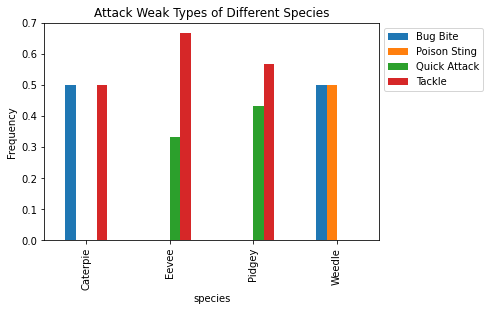

In [23]:
temp.plot.bar()
plt.title('Attack Weak Types of Different Species')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Yes, there is an association between species and attack weak types in this dataset. For instance, Pidgey's are more likely to use 'quick attacks' than Eevees. Thus, there is an association.


(In general, if at least one color has boxes that are of different heights in the plot above, then there is an association between the two categorical variables.)

### 3.2. Pokemon Type and CP Relationship

Is there an association between the pokemon type and CP for the pokemon in this dataset?

#### 3.1. Visualization

Create a side-by-side boxplot, plotting the CP of the pokemon that have each of the three different pokemon types.
Also create a side-by-side violin plot, plotting the CP of the pokemon that have each of the three different pokemon types.

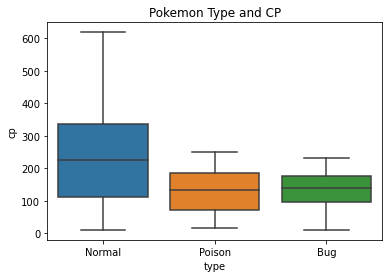

In [24]:
sns.boxplot(x="type", y="cp", data=df)
plt.title('Pokemon Type and CP')
plt.show()

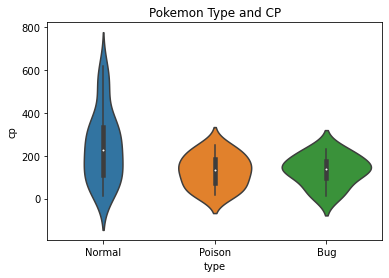

In [25]:
sns.violinplot(x="type", y="cp", data=df)
plt.title('Pokemon Type and CP')
plt.show()

#### 3.2. Comparison

Compare the CP distributions of each of the three pokemon types.

1. Compare the shapes of the three distributions
2. Compare the measures of center for the three distributions (make sure you choose the appropriate measure of center to compare here). **Actually calculate these three measures of center below**.
3. Compare the measures of spread for the three distributions (make sure you choose the appropriate measure of spread to compare here). **Actually calculate these three measures of spread below**.
2. Compare the nature/existence of any outliers for the three distributions.




1. <u>Shape</u>: The normal pokemon CPs are unimodal heavily skewed to the right, whereas the other types of pokemon CPs are more symmetric and unimodal.
2. <u>Measure of Center</u>: The median CP of normal pokemon is higher than the median CPs of poison and bug type pokemon.
3. <u>Measure of Spread</u>: The IQR of the normal pokemon types is larger than the IQR for the poison and bug types.
4. <u>Outliers</u>: None of these three CP distributions have any outlier CP values.

Because the CP distribution for normal types of pokemon is skewed, we should use the medians as a measure of center to compare and the IQRs as a measure of spread to compare. These summary statistics are better at describing skewed distributions.

In [26]:
df[df['type']=='Normal']['cp'].median()

226.0

In [27]:
df[df['type']=='Poison']['cp'].median()

134.0

In [28]:
df[df['type']=='Bug']['cp'].median()

138.0

In [29]:
df[df['type']=='Normal']['cp'].quantile(.75)-df[df['type']=='Normal']['cp'].quantile(.25)

224.5

In [30]:
df[df['type']=='Poison']['cp'].quantile(.75)-df[df['type']=='Poison']['cp'].quantile(.25)

113.0

In [31]:
df[df['type']=='Bug']['cp'].quantile(.75)-df[df['type']=='Bug']['cp'].quantile(.25)

80.25

#### 3.3. Association

Based on your answers in 3.1 and 3.2, would you say that there exists a *strong* relationship between pokemon type and CP? Why or why not?

While the median CP of normal type pokemon is almost twice as high as the medians for Poison and Bug pokemon, because the IQRs of these three distributions overlap quite strongly, there is not a *strong* association between pokemon type and CP in this dataset.

#### 3.4. More visualizations

Plot a histogram for the CP of the normal types of pokemon.

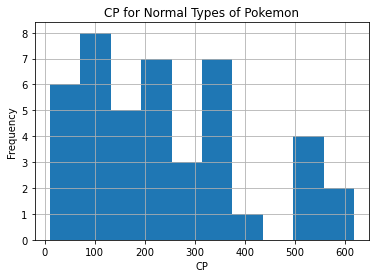

In [32]:
df[df['type']=="Normal"]['cp'].hist()
plt.title('CP for Normal Types of Pokemon')
plt.ylabel('Frequency')
plt.xlabel('CP')
plt.show()

## 5. Probability - (2 Pidgeys, 1 Eevee, 1 Caterpie in a Sample)

### 5.1. Theoretical Sample Probability
If we were to collect a random sample of 4 pokemon from this dataset (without replacement), what is the probability that we had 2 Pidgeys, 1 Caterpie, and 1 Eevee in our sample?

The count breakdown for each type of species in this dataset is shown below.

In [33]:
df['species'].value_counts()

Pidgey      37
Weedle      20
Caterpie    10
Eevee        6
Name: species, dtype: int64

**Does random sample experiment follow the uniform probability model?**
The likelihood of selecting any one particular *pokemon* to be in this sample is no different than any other. Thus any sample of 4 pokemon from our dataset is no more likely than any other. So we can use the uniform probability model to calculate this probability.

**Denominator**:
First, we need to calculate how many ways we can create a sample of k=4 pokemon from a population of size n=73, where the **order/allocation of the pokemon in the sample does not matter**, and we are drawing from the population **without replacement**.

This can be calculated with the function ${n\choose k}={73\choose 4}=\frac{73\times72\times71\times70\times69...\times 1}{(4\times3\times2\times 1)(69\times...\times 1)}=1088430$

In [34]:
denominator=(73*72*71*70)/(4*3*2*1)
denominator

1088430.0

**Numerator**:
Next, in our numerator we need to calculate all ways we could have 2 Pidgeys, 1 Caterpie, and 1 Eevee in the sample. Thus we have three decisions we would need to make:
* Which k=2 Pidgeys out the n=37 do we put in the sample?
    - We also do not care about the order/allocation of Pidgeys in this sample of 2.
    - Thus the number of ways to have 2 pidgeys can be calculated as ${n\choose k}={37\choose 2}=\frac{37\times36\times35...\times 1}{(2\times 1)(35\times...\times 1)}=666$
* Which k=1 Caterpie out the n=10 do we put in the sample?
    - We also do not care about the order/allocation of Caterpie in this sample of 1.
    - Thus the number of ways to have 1 caterpie can be calculated as ${n\choose k}={10\choose 1}=10$
* Which k=1 Eevee out the n=6 do we put in the sample?
    - We also do not care about the order/allocation of eevee in this sample of 1.
    - Thus the number of ways to have 1 eevee can be calculated as ${n\choose k}={6\choose 1}=6$

Thus, the total number of ways we could have 2 Pidgeys, 1 Caterpie, and 1 Eevee in the sample is: $666\times10\times6=39960$

In [35]:
(37*36)/(2*1)

666.0

In [36]:
numerator=666*10*6
numerator

39960

Thus the probability of having 2 pidgeys, 1 caterpie, and 1 eevee in the sample is $\frac{39960}{1088430}=0.0367$.

In [37]:
theoretical_proability=numerator/denominator
theoretical_proability

0.03671343127256691

### 5.2. Approximating the Probability Through Simulations

Next, we would like to approximate this probability that we randomly select a sample with 2 pidgeys, 1 caterpie and 1 eevee through a simulation.

**Tutorial:** We can use the **.tolist()** function to convert a pandas series into a list.

In [38]:
sample = pd.Series(['Pidgey', 'Pidgey', 'Eevee'])
sample

0    Pidgey
1    Pidgey
2     Eevee
dtype: object

In [39]:
sample_list=sample.tolist()
sample_list

['Pidgey', 'Pidgey', 'Eevee']

#### 5.2.1. Random sample
First, collect a random sample of 4 pokemon from the population without replacement. Use a random state of 88. Also, sort this sample alphabetically (by the species name).

In [40]:
sample=df['species'].sample(4, random_state=88).sort_values()
sample

60    Caterpie
8       Pidgey
27      Pidgey
36      Pidgey
Name: species, dtype: object

#### 5.2.2. Sample Checking Function

Let's use this to make a function that checks whether our random sample is comprised of two pidgeys, one caterpie, and one eevee.

In [41]:
def is_success_sample(species_list):
    if species_list==['Caterpie', 'Eevee', 'Pidgey', 'Pidgey']:
        return True
    else:
        return False

In [42]:
is_success_sample(sample_list)

False

#### 5.2.3. Let's use this function to approximate the probability of randomly selecting an Eevee, a caterpie, and two pidgeys in a random sample from this population.

Collect 1000 random samples from the population without replacement and find the proportion of samples that have this species composition.

In [43]:
success_count=0
for i in range(0,1000):
    #Collect a random sample
    sample=df['species'].sample(4).sort_values()
    
    #Remember to sort it so your function works
    sample_list=sample.tolist()
    
    #Update the success count with a 1 (success sample) or a 0
    success_count+=is_success_sample(sample_list)

In [44]:
approximated_probability=success_count/1000
approximated_probability

0.037

#### 5.2.4. Comparing

How close is this approximate probability from 5.2.3 close to your theoretical probability from 5.1?

In [45]:
theoretical_proability-approximated_probability

-0.0002865687274330869

## 6. Probability - Random Sample of 4 Pokemon with Replacement


### 6.1. Expected Average Number of Pidgeys

Suppose we were to collect many, many random samples of Pokemon from this dataset (WITH replacement). What would we expect the average number of Pidgeys in each of these samples to be?

We can define a random variable that will help us answer this question.

Let X = # of Pokemon in our random sample (out of n=4) that are a Pidgey.
Because 50.7% of the pokemon in this dataset are Pidgeys and because we are randomly sampling WITH replacement, then the probability that each randomly sampled pokemon will be a Pidgey will always be p=0.507.

In [46]:
df[df['species']=='Pidgey'].shape[0]/df.shape[0]

0.5068493150684932

This random variable actually fits the definition of a binomial random variable. In other words:

X = # of independent trials (ie. randomly sampled Pokemon) out of n=4 that are a success (ie. a Pidgey), where the probability of a success (ie. Pidgey) is $p=0.507$.

We know that our trial outcomes (ie. whether or not a selected Pokemon is a Pidgey or not) are independent, because we are randomly sampling WITH replacement.

Thus, $X\sim Bin(n=4, p=0.507)$.

Therefore, $E[X]$ represents the average value number of Pidgeys we would expect in many, many random samples (with replacement) of 4 pokemon.

We know of two ways to calculate $E[X]$, when $X$ is a binomial random variable (you should know both).

**Using Python Random Variable Functions**

In [47]:
from scipy.stats import binom
expected_mean = binom.mean(n=4, p=0.507)
expected_mean

2.028

**Using the equation for $E[X]$, when $X\sim Bin(n,p)$.**

In [48]:
n=4
p=0.507
expected_mean = n*p
expected_mean

2.028

### 6.2. Expected Standard Deviation of Pidgeys

Suppose we were to collect many, many random samples of Pokemon from this dataset (WITH replacement). What would we expect the standard deviation of Pidgeys in each of these samples to be?

$SD[X]$ represents the standard deviation of Pidgeys we would expect in many, many random samples (with replacement) of 4 pokemon.

We know of two ways to calculate $sd[X]$, when $X$ is a binomial random variable (you should know both).

**Using Python Random Variable Functions**

In [49]:
from scipy.stats import binom
expected_std = binom.std(n=4, p=0.507)
expected_std

0.9999019951975293

In [50]:
n=4
p=0.507
expected_std = np.sqrt(n*p*(1-p))
expected_std

0.9999019951975293

### 6.3. Random Variable Values for X

Define a random variable **X = # of Pokemon in our random sample (out of n=4) that are a Pidgey.**

#### 6.3.1. Generating Random Variable Values

 Generate 300 values for this random variable X and put them in a dataframe.

(You how to do this in two ways. You should know how to do both).

**Eaiser way, just use the .rvs() function**.

Because $X\sim Bin(n=4, p=0.507)$, then we can just use the **binom.rvs()** function generate 300 random variable values for X.

In [51]:
X_list = binom.rvs(n=4, p=0.507, size=300)
X_list

array([3, 3, 3, 3, 1, 2, 3, 3, 3, 2, 1, 2, 1, 2, 1, 1, 1, 2, 3, 2, 2, 2,
       2, 3, 1, 3, 2, 4, 2, 3, 2, 4, 2, 1, 1, 3, 2, 3, 2, 3, 2, 3, 3, 1,
       4, 2, 1, 1, 2, 2, 3, 4, 3, 1, 3, 2, 3, 3, 3, 1, 1, 2, 1, 4, 2, 1,
       3, 3, 2, 4, 3, 2, 3, 3, 2, 1, 2, 2, 3, 2, 3, 4, 2, 3, 3, 2, 3, 3,
       3, 1, 1, 3, 2, 3, 3, 1, 3, 4, 2, 1, 3, 2, 1, 2, 0, 2, 1, 3, 2, 2,
       2, 1, 4, 2, 1, 1, 2, 2, 1, 2, 3, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 4,
       3, 1, 1, 4, 2, 3, 2, 4, 1, 1, 3, 0, 1, 0, 2, 3, 3, 3, 1, 1, 2, 1,
       2, 3, 2, 2, 4, 2, 0, 1, 4, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 3,
       1, 3, 2, 3, 4, 2, 2, 0, 2, 3, 1, 3, 1, 2, 2, 2, 3, 3, 2, 3, 1, 4,
       3, 0, 2, 1, 4, 2, 0, 2, 1, 2, 4, 1, 1, 2, 1, 3, 1, 2, 3, 1, 1, 0,
       1, 1, 2, 3, 3, 0, 4, 3, 1, 2, 3, 0, 2, 1, 1, 2, 1, 3, 0, 2, 2, 2,
       3, 1, 2, 3, 1, 0, 2, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 4, 3, 3, 3,
       2, 2, 0, 1, 2, 1, 3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2,
       3, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 3, 2])

In [52]:
df_X = pd.DataFrame({'X': X_list})
df_X

,X
0,3
1,3
2,3
3,3
4,1
...,...
295,0
296,2
297,2
298,3


#### 6.3.2. Mean and Standard Deviation

Calculate the mean and the standard deviation of these 300 values that you generated in 6.3.1.

In [53]:
actual_mean = df_X['X'].mean()
actual_mean

2.03

In [54]:
actual_std = df_X['X'].std()
actual_std

0.9928338549551741

#### 6.3.3. Comparision

How close are your mean and standard deviation values from 6.3.1 and 6.3.2?

In [55]:
expected_mean-actual_mean

-0.0019999999999997797

In [56]:
expected_std-actual_std

0.0070681402423552475

They are quite close. If we had collected even more random variable values for X, we would expect them to be even closer.

### 6.4. Random Variable Values for $\bar{X}$

Define a new random variable to be $\bar{X}=\frac{X_1+X_2+X_3+...+X_{300}}{300}$, where

**$X_i$ = # of Pokemon in our $ith$ random sample (out of n=4) that are a Pidgey.**

Generate 5 random variable values for $\bar{X}$

In [57]:
X_bar_list=[]

for i in range(5):
    
    #1. Generate random variable values for X1, X2, ..., X300
    X_list=binom.rvs(n=4, p=0.507, size=300)
    df_X = pd.DataFrame({'X': X_list})
    
    #2. Generate a random variable value for X-bar(by taking the average of X1, X2, ..., X300)
    X_bar = df_X['X'].mean()
    
    #3. Add this X_bar random variable value to our list
    X_bar_list.append(X_bar)

X_bar_list

[2.01, 1.99, 2.046666666666667, 2.0, 2.0033333333333334]

### 6.5. Probabilities

#### 6.5.1. Exactly Two Pidgeys

What is the probability that two of the Pokemon in our random sample (with replacement) of 4 Pokemon from this dataset are Pidgeys?

This is equivalent to us asking: what is $P(X=2)$, where we know that $X\sim Bin(n=4, p=0.507)$.

We can solve this in one of two ways (you should know how to do both).

**Using Python functions**

In [58]:
p_2 = binom.pmf(n=4, p=0.507, k=2)
p_2

0.374853014406

**Using the binomial PMF equation**

$P(X=2) = {n\choose 2} p^{2}(1-p)^{n-2} ={4\choose 2} (0.507)^{2}(1-0.507)^{4-2} = \frac{4!}{2!(4-2)!}(0.507)^{2}(1-0.507)^{4-2}$

In [59]:
p_2 = ((4*3*2*1)/((2*1)*(2*1)))*(0.507**2)*(1-0.507)**(2)
p_2

0.374853014406

#### 6.5.2. Two Pidgeys, 1 Caterpie, 1 Eevee (with replacement)

What is the probability of collecting a random sample (with replacement) of two Pidgeys, 1 Caterpie, and 1 Eevee?

Because we are randomly sampling WITH replacement, then we can assume that the events of drawing a pidgey, drawing another pidgey, drawing a caerpie, and drawing a eevee are all independent.

Thus, we can use the probability equation below.

$P(\mbox{pidgey AND pidgey AND caterpie AND eevee}) = P(pidgey)P(pidgey)P(caterpie)P(eevee) = (0.507)(0.507)(0.137)(0.082)=0.00289$

In [60]:
prob_pidgey = df[df['species']=='Pidgey'].shape[0]/df.shape[0]
prob_pidgey

0.5068493150684932

In [61]:
prob_cat = df[df['species']=='Caterpie'].shape[0]/df.shape[0]
prob_cat

0.136986301369863

In [62]:
prob_eevee = df[df['species']=='Eevee'].shape[0]/df.shape[0]
prob_eevee

0.0821917808219178

In [63]:
pidgey_2_cat_1_eevee_1 = prob_pidgey*prob_pidgey*prob_cat*prob_eevee
pidgey_2_cat_1_eevee_1

0.0028924326686290184

#### 6.5.3 Conditional Probabilities

Suppose that we randomly select a sample of 4 Pokemon from this dataset with replacement, and we know that it ended up having 2 Pidgeys. What is the probability that this random sample has: 2 Pidgeys, 1 Eevee, and 1 Pidgey GIVEN that we know that it had 2 Pidgeys?

The probability that we are trying to calculate is a conditional probability (notice the "GIVEN" key word), and it is as follows.

$P(\mbox{2 Pidgeys, 1 Eevee, 1 Caterpie}|\mbox{2 Pidgeys, other 2 are not Pidgeys})$

We can use Bayes equation to help us calculate this conditional probability.

$P(\mbox{2 Pidgeys, 1 Eevee, 1 Caterpie}|\mbox{2 Pidgeys, other 2 are not Pidgeys}) = \frac{P([\mbox{2 Pidgeys, 1 Eevee, 1 Caterpie] AND [2 Pidgeys, other 2 are not Pidgeys}])}{P(\mbox{2 Pidgeys, other 2 are not Pidgeys})}$


In the numerator above, we can see that the event of "2 Pidgeys, 1 Eevee, 1 Caterpie" is a more specific subset of the event 2 "Pidgeys, other 2 are not Pidgeys". Thus, taking the intersection (ie. AND) of them is just equivalent to the outcome of "2 Pidgeys, 1 Eevee, 1 Caterpie". Thus this probability simplifies to:

$= \frac{P([\mbox{2 Pidgeys, 1 Eevee, 1 Caterpie}])}{P(\mbox{2 Pidgeys, other 2 are not Pidgeys})}$

$= \frac{P([\mbox{2 Pidgeys, 1 Eevee, 1 Caterpie}])}{P(\mbox{X=2})} = \frac{.00289}{0.375} = 0.0077$



In [64]:
conditional_prob = pidgey_2_cat_1_eevee_1/p_2
conditional_prob

0.007716178228451566

## 7. TA Stipends (Not Using the Pokemon Dataset)

Suppose that the yearly stipends (ie. salaries) of all TAs in the U.S. is normally distributed and has a standard deviation of $4000.


### 7.1. Finding the Mean TA Stipend

Suppose that you discover that a TA for one of your classes makes $50,000 and that only 30% of TAs in the country make more than this. What is the average stipend of all TAs in the country?

**1. Curating Problem Information**

We can define a random variable
X = stipend of a randomly selected TA in the U.S.

We are told that: $X\sim N(\mu=?, \sigma =4000)$.

In this problem we need to figure out what $\mu$ is (ie. the average stipend of all TAs in the country), based on the rest of the information that we are given.


**2. X and the Z-score of X**

Let's define another random variable $Z=\frac{X-\mu}{\sigma}$ to be the z-score of a randomly selected TA stipend in the U.S. Because X is a normal random variable, then we know that $Z$ must be a standard normal random variable (ie. $Z\sim N(\mu=0, \sigma=1)$).

The PDFs for both X and Z are shown below.

<img src="number_7.png" width="800" height="500" alt="" />

**3. 50,000 stipend vs. the z-score of the 50,000 stipend**

We know that a 50,000 dollar stipend is less than 30% of all TA stipends and greater than 70% of all TA stipends. In turn, we also know that the z-score of a $50,000 stipend is less than 30% of all TA stipend z-scores and greater than 70% of all TA stipend z-scores.

**4. Two Ways to Represent the z-score of a $50,000 stipend**

1. The first way to represent the z-score of a $50,000 is the simply just use the z-score equation

$z-score = \frac{50000-\mu}{\sigma} = \frac{50000-\mu}{4000} $

2. The second way is realize to find the value of the $z-score$ in which $P(Z<z-score)=0.70$. Because $Z$ is the standard normal random variable, we can use the norm.ppf() function below to find this z-score value as well to be:

**$z-score=0.524$**


**5. Solving for $\mu$**

Finally we can set the two version of the z-score equal to each other and solve for $\mu$.

$\frac{50000-\mu}{4000} = 0.524$

$\mu=47904$





In [65]:
from scipy.stats import norm
norm.ppf(0.70, loc = 0, scale = 1)

0.5244005127080407

In [66]:
50000-4000*.524

47904.0

### 7.2. Stipend Probabilities

Using the mean stipend that you found in 7.1, calculate the probability of randomly selecting a TA with a stipend that is between 40,000 and 45,000 dollars.

$P(40000\leq X\leq 45000) = P(X\leq 45000) - P(X\leq 40000) = 0.2339 - 0.0241 = 0.2098$

In [67]:
p45 = norm.cdf(45000, loc=47904, scale=4000)
p45

0.23391938527646383

In [68]:
p35 = norm.cdf(40000, loc=47904, scale=4000)
p35

0.024077388601338706

In [69]:
prob = p45-p35
prob

0.20984199667512513